# 기계학습 및 실습 2024년 2학기 중간과제

## 타이타닉 데이터셋 분석 

인공지능융합학부 안정빈(2020100381)

## 타이타닉 데이터 분석 목차

- [1. 데이터 불러오기](#1-데이터-불러오기)
    - [1-1. 데이터의 변수 정보 파악](#1-1-데이터의-변수-정보-파악)
- [2. 탐색적 분석(EDA)](#2-탐색적-분석eda)
    - [2-1. 단일 변수 파악](#2-1-단일-변수-파악)
    - [2-2. 다중 변수 파악](#2-2-다중-변수-파악)
- [3. 머신러닝](#3-머신러닝)
    - [3-1. 결측치 채우기](#3-1-결측치-채우기)
    - [3-2. 모델 학습](#3-2-모델-학습)
    - [3-3. 정확도 출력](#3-3-정확도-출력)

### 1. 데이터 불러오기 <a id="데이터-불러오기"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.family'] = 'Malgun Gothic'

df=pd.read_csv("./data/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age, Cabin, Embarked 변수에 결측치가 존재하는 것을 알 수 있다. 
그 외 변수에는 결측치가 존재하지 않는다.

In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


[2장 기초 데이터 분석](##기초-데이터-분석)

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


전체 인원 수: 891
생존 인원 수: 342
사망 인원 수: 549


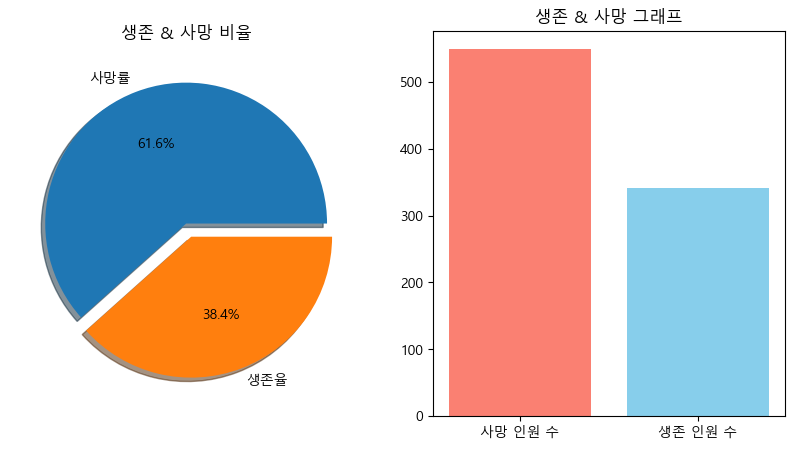

In [7]:
survive=df[df['Survived'] == 1]['Survived'].count()
death=df[df['Survived'] == 0]['Survived'].count()
values=[death,survive]
categories=['사망 인원 수','생존 인원 수']
print("전체 인원 수:", df['Survived'].count())
print("생존 인원 수:", survive)
print("사망 인원 수:", death)


f,ax=plt.subplots(1,2,figsize=(10,5))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['사망률', '생존율'],ax=ax[0],shadow=True)
ax[0].set_title('생존 & 사망 비율')
ax[0].set_ylabel('')

ax[1].bar(categories, values ,color=['salmon', 'skyblue'])
ax[1].set_title('생존 & 사망 그래프')

plt.show()

전체 탑승객 891명 중, 생존 인원은 342, 사망 인원은 549명이다. 
전체 탑승객 중 61.6%가 사망했고, 38.4%만이 생존하였다. 
이 생존 확률을 기준으로, 어떤 상황에서 생존률이 높고 낮은지 판단할 수 있다.

In [8]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

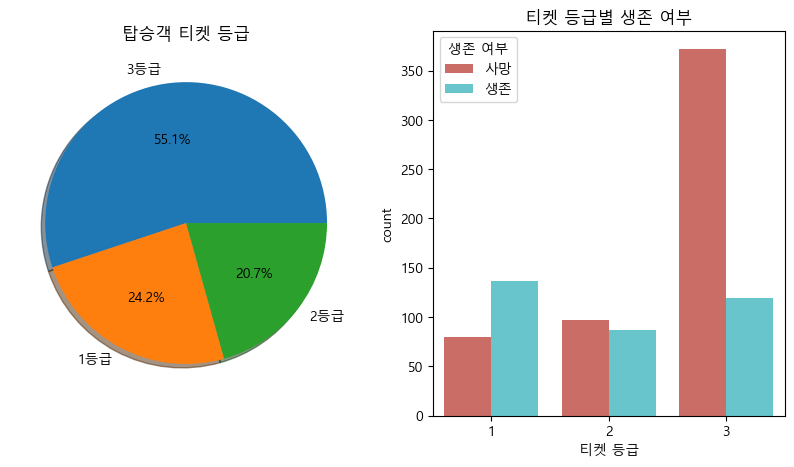

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',labels=['3등급', '1등급','2등급'],ax=ax[0],shadow=True)
ax[0].set_title('탑승객 티켓 등급')
ax[0].set_ylabel('')

ax[1]=sns.countplot(data=df, x="Pclass", palette='hls', hue='Survived')
ax[1].set_title('티켓 등급별 생존 여부')
ax[1].set_xlabel('티켓 등급')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')


1등급 탑승객의 비율은 24.2%, 2등급 탑승객의 비율은 20.7%, 3등급 탑승객의 비율은 55.1%로 절반 이상의 승객이 3등급칸을 이용하였다.

1등급 탑승객의 경우, 생존확률이 70%정도 되지만, 2등 탑승객의 경우 생존확률이 50%에 못 미친다. 그럼에도 1,2등급 승객은 전체 생존률인 38.4%보다 높은 생존률을 보이고 있다.

3등급 탑승객의 경우, 생존확률이 25%정도밖에 되지 않는다.

이를 통해, 1,2등급 승객을 우선으로 구조에 나섰음을 유추해볼 수 있다.

In [10]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

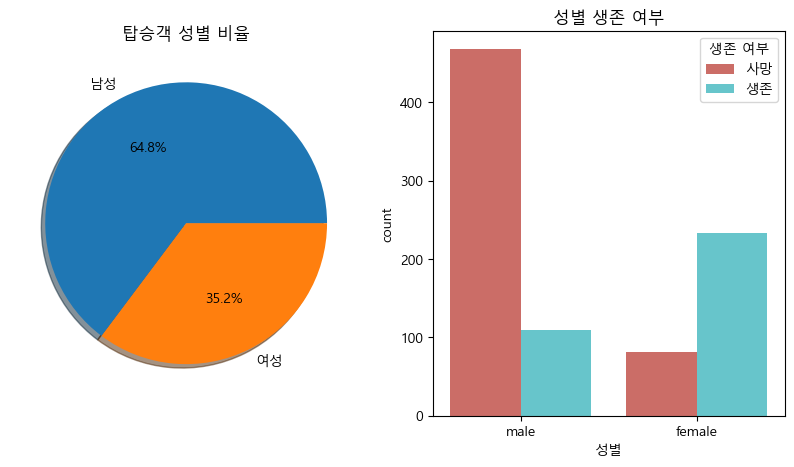

In [11]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%',labels=['남성', '여성'],ax=ax[0],shadow=True)
ax[0].set_title('탑승객 성별 비율')
ax[0].set_ylabel('')

ax[1]=sns.countplot(data=df, x="Sex", palette='hls', hue='Survived')
ax[1].set_title('성별 생존 여부')
ax[1].set_xlabel('성별')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

남성 탑승객의 비율은 64.8% 여성 탑승객의 비율은 35.2%로 남성 탑승객의 비율이 더 높은 것을 알 수 있다.

그러나 생존한 남성 탑승객수보다, 생존한 여성 탑승객의 수가 많을정도로, 남녀의 생존률이 큰 차이를 보이는 것을 알 수 있다.

남성의 생존률은 20%가 되지 않지만, 여성의 생존률은 70%이상인 것을 알 수 있다.

이를 통해 여성이 구조 우선순위였음을 유추해볼 수 있다.

탑승한 동반자 수(형제, 자매, 배우자)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

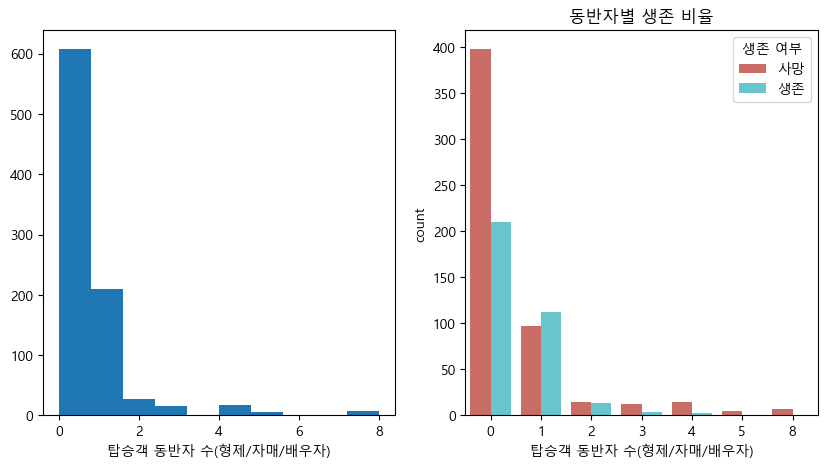

In [12]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['SibSp'])
ax[0].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')

sns.countplot(data=df, x="SibSp", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

print("탑승한 동반자 수(형제, 자매, 배우자)")
df['SibSp'].value_counts()

891명의 승객중 608명의 승객이 형제,자매, 배우자 등과 탑승하지 않은 것으로 드러났다.
그 외 209명의 승객이 1명의 동반자와 탑승하였다. 즉 대부분의 승객들이 1명 이하의 형제, 자매, 배우자와 탑승한 것을 알 수 있다.

동반자 수와 생존률을 같이 확인해보면, 1,2명의 동반자가 있을 때 제일 높은 생존율을 보이는 것을 알 수 있다. 

표본이 작지만, 4,5,8명의 동반자 즉 많은 동반자와 탑승한 승객의 생존률이 매우 낮은 것을 알 수 있다. 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

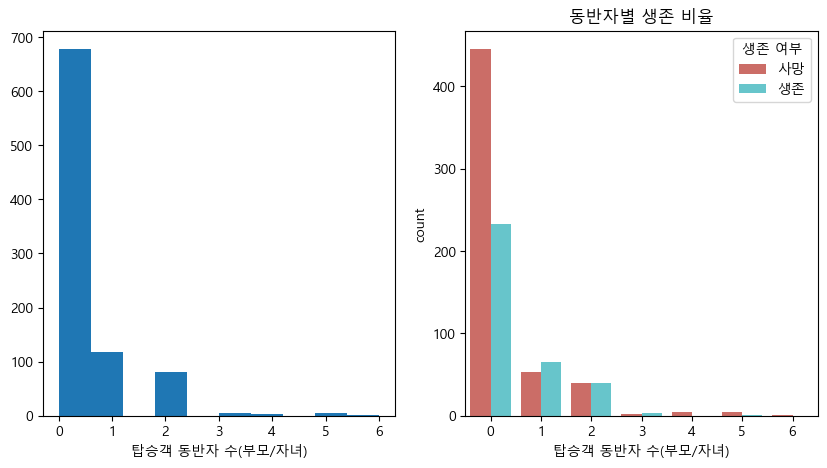

In [13]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['Parch'])
ax[0].set_xlabel('탑승객 동반자 수(부모/자녀)')

sns.countplot(data=df, x="Parch", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(부모/자녀)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

df['Parch'].value_counts()

부모/자녀 없이 혼자 탑승한 고객이 678명으로 제일 많으며, 1명의 부모/자녀와 탑승한 고객이 118명, 2명의 부모/자녀와 탑승한 고객이 80명으로 대부분을 차지하고 있다.

위와 마찬가지로, 1명,2명의 부모/자녀와 탑승한 고객의 생존률이 50%이상임을 알 수 있다.
더 확인해봐야겠지만, 1,2명의 부모/자녀와 탑승한 고객들이 높은 등급의 객실에 머물렀을 가능성이 높거나, 구조 우선순위였음이 예상된다.

In [14]:
bins = range(0, 86, 5) 
labels = [f'{i}-{i+4}' for i in bins[:-1]] 

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Age_group'].value_counts()

Age_group
20-24    114
25-29    106
30-34     95
15-19     86
35-39     72
40-44     48
45-49     41
0-4       40
50-54     32
5-9       22
10-14     16
55-59     16
60-64     15
70-74      6
65-69      4
80-84      1
75-79      0
Name: count, dtype: int64

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_29452\2648788405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age_group", palette='hls',ax=ax[0],legend=False)


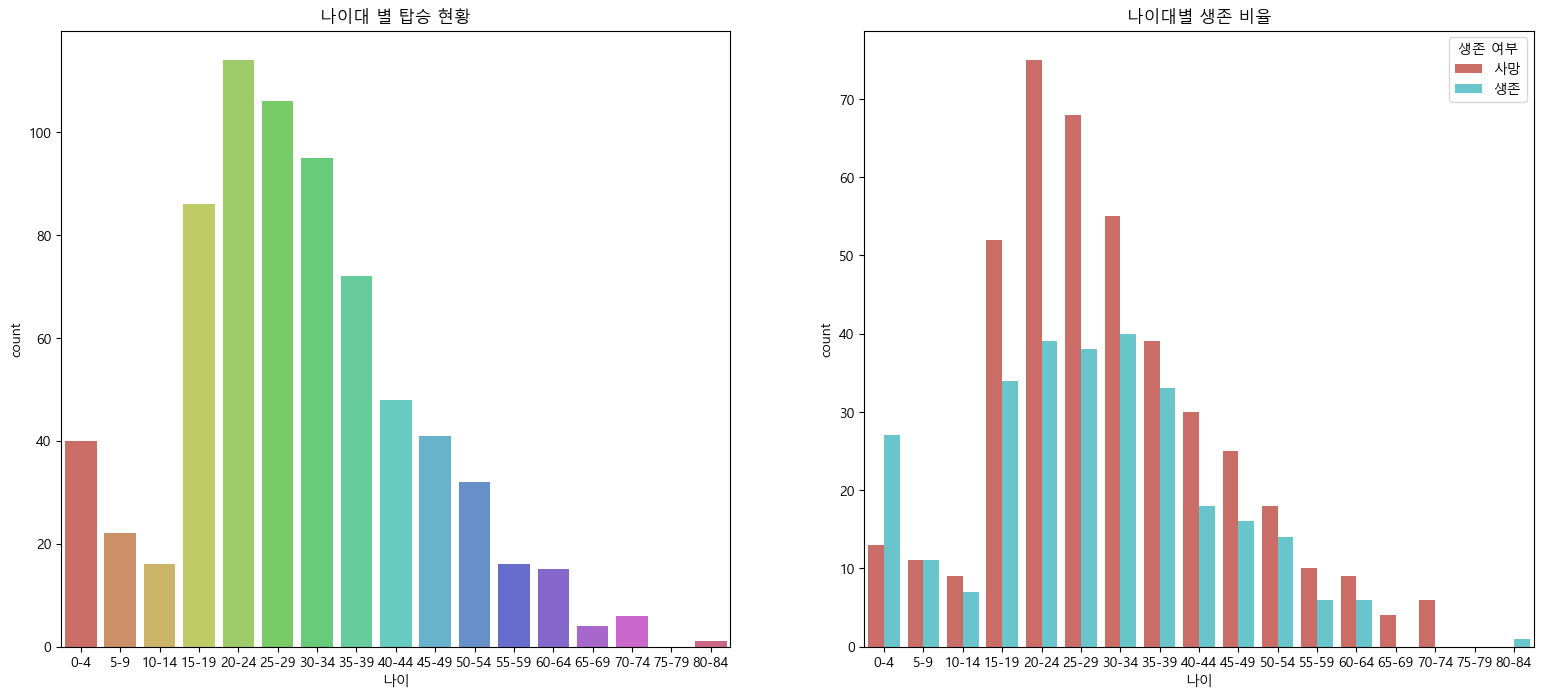

In [15]:
f,ax=plt.subplots(1,2,figsize=(19,8))
sns.countplot(data=df, x="Age_group", palette='hls',ax=ax[0],legend=False)
ax[0].set_title('나이대 별 탑승 현황')
ax[0].set_xlabel('나이')

sns.countplot(data=df, x="Age_group", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('나이대별 생존 비율')
ax[1].set_xlabel('나이')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

15~34세 나이의 승객이 제일 많았음을 알 수 있다. 

나이대별 생존 그래프를 보면 14세 미만의 아이들의 생존률이 제일 높게 나타나고 있다. 특히 0~4세 유아들의 생존률은 66%이상으로 보인다. 어린 아이들을 우선적으로 구조했음을 예상해볼 수 있다. 

20~29세 사이의 승객들이 제일 많이 사망한 것을 알 수 있다. 또한 낮은 생존률을 보이고 있다




In [16]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

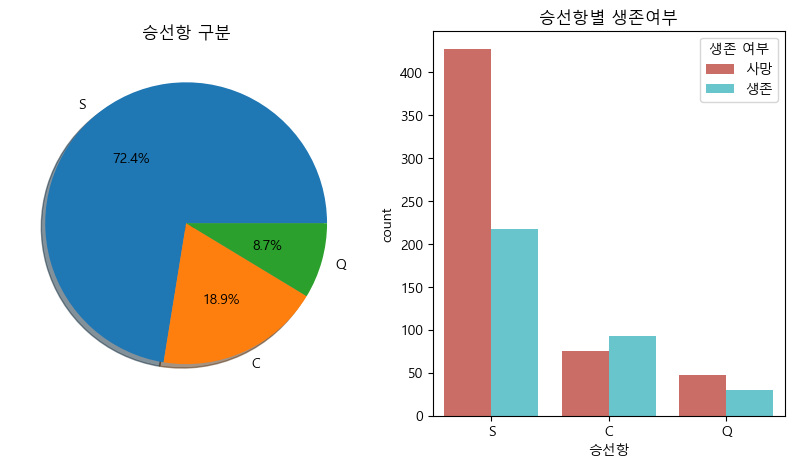

In [17]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("승선항 구분")
ax[0].set_ylabel('')

ax[1]=sns.countplot(data=df, x="Embarked", palette='hls', hue='Survived')
ax[1].set_title('승선항별 생존여부')
ax[1].set_xlabel('승선항')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

'Southampton'에서 승선한 승객이 72.4%로 매우 높은 비율임을 알 수 있다. 그러나 다른 승선장에서 탑승한 승객들에 비해 낮은 생존률을 보이고 있다.

'Cherbourg'에서 승선한 승객은 18.9%로 50%가 넘는 생존률을 보이고 있다. 

In [18]:
print('최고 요금:',df['Fare'].max())
print('최저 요금:',df['Fare'].min())
print('평균 요금:',df['Fare'].mean())
print('요금 표준편차:',df['Fare'].std())

최고 요금: 512.3292
최저 요금: 0.0
평균 요금: 32.204207968574636
요금 표준편차: 49.6934285971809


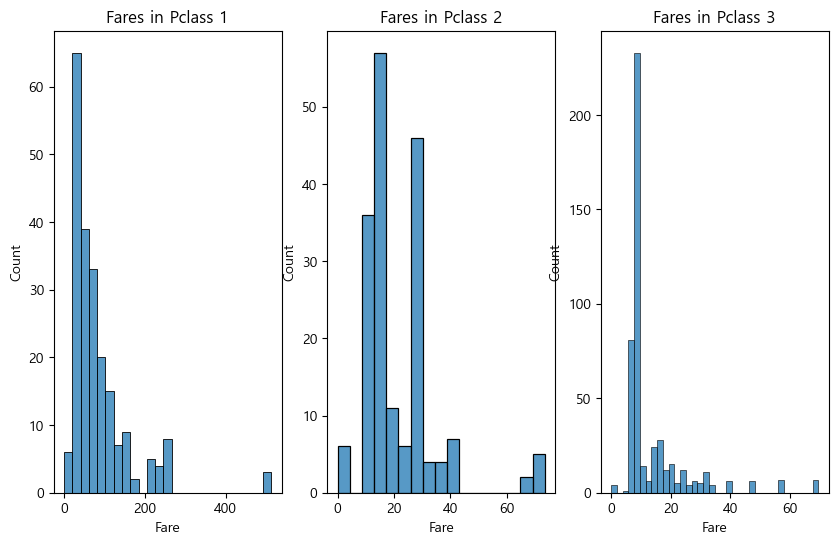

In [19]:
f,ax=plt.subplots(1,3,figsize=(10,6))
sns.histplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## 2개의 변수를 고려하여 생존률 확인 

In [20]:
# 성별, 티켓 등급별 생존률 
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

<Figure size 1000x600 with 0 Axes>

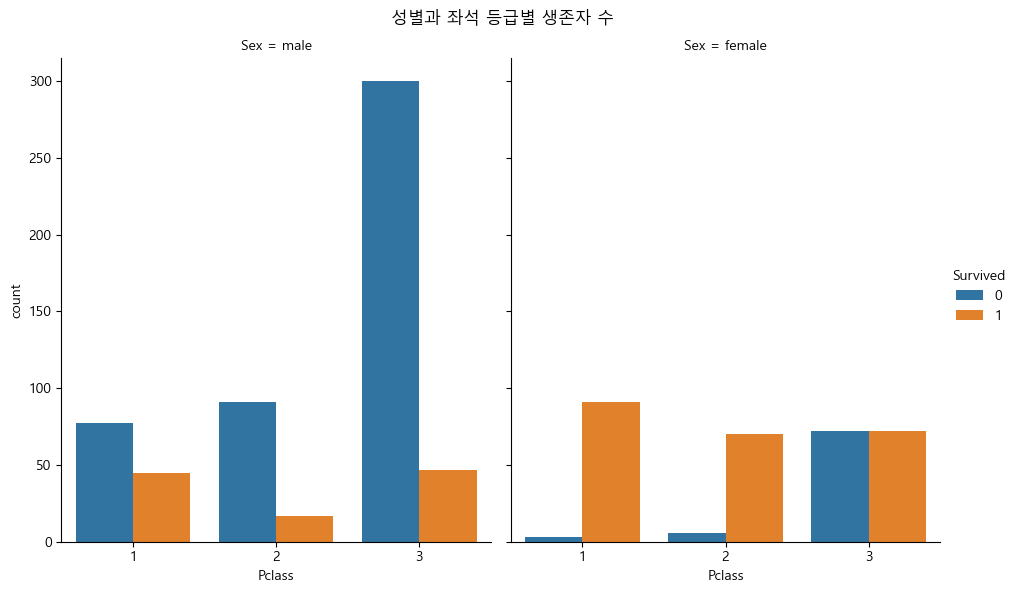

In [21]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count', height=6, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('성별과 좌석 등급별 생존자 수')
plt.show()

성별과 탑승석 등급을 이용해 더 자세히 생존률을 파악해보려고 한다. 

1 등급석과 2등급석에 탑승한 여성은 대부분 생존한 것을 확인할 수 있다. 

또한 3 등급석에 탑승한 여성들 역시 절반이 생존한 것을 확인할 수 있다. 

그에 비해 1등급석에 남자는 37%의 생존률로 전체 생존률보다, 조금 더 높은 생존률을 보인다. 

2,3등급석의 남성은 각각 16%, 14% 생존률로, 전체 생존률보다 매우 낮다. 

이를 통해 1,2 등급이 구조의 우선 순위였으며, 그 중 여성을 먼저 구조한 것을 확인할 수 있다. 

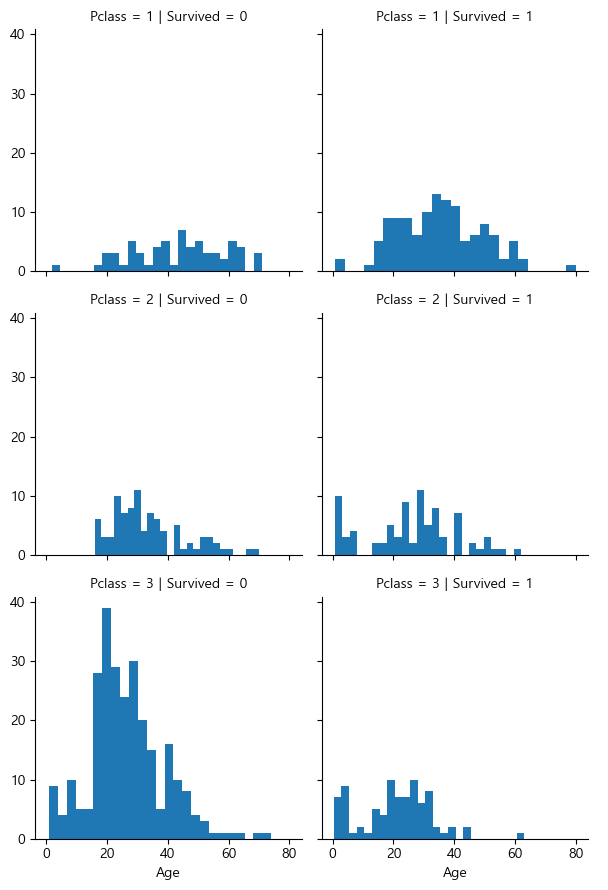

In [22]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

지금까지 살펴보면, 성별이 여성일 때 그리고 티켓 등급이 1등급일때, 승선항이 'Cherbourg'일때 생존률이 높게 나타나고 있다.

그래서 각 승선항 별 승객들의 성별, 티켓 등급에 대한 궁금증이 생겼다. 



In [23]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

Text(0.5, 1.0, '승선항 별 티켓 등급')

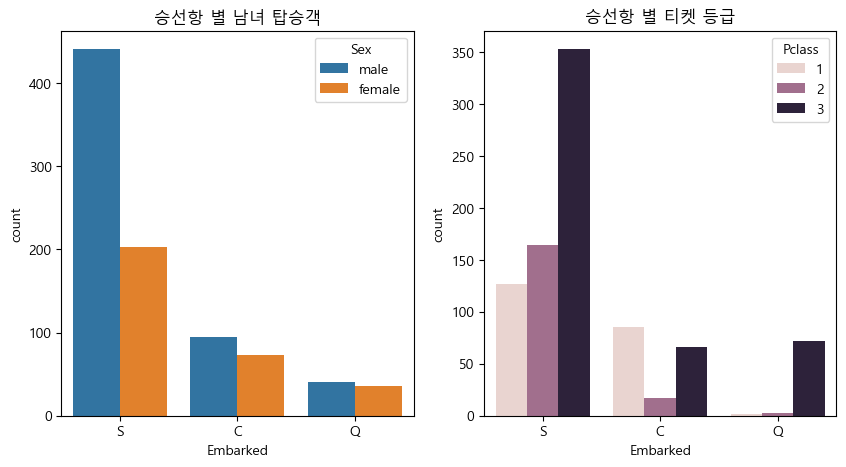

In [24]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='Embarked',hue='Sex',ax=ax[0])
ax[0].set_title('승선항 별 남녀 탑승객')

sns.countplot(data=df,x='Embarked',hue='Pclass',ax=ax[1])
ax[1].set_title('승선항 별 티켓 등급')

다음의 교차표를 보면, 생존률이 제일 높던 'Cherbourg'에서 승선한 탑승객의 50%가 1등급 좌석을 사용한 것과, 탑승객의 43%가 여성인 것을 알 수 있다. 

이를 통해 'Cherboug'에서 승선한 고객의 생존률이 높은 것은 높은 등급의 좌석을 탑승한 것으로 유추할 수 있다.

'Q'에서 승선한 탑승객은 95%이상이 3등급 좌석을 사용하였다. 그러나 다른 승선항에 비해 여성의 비율이 높아, 'S' 승선항 승객들에 비해 조금 더 높은 생존률을 가지고 있다.

'S'에서 승선한 탑승객은 50%이상이 3등급 좌석을 사용하였다. 그러나 남성의 비율이 70%로 높아, 다른 승선항에서 탑승한 승객들보다 낮은 생존률을 보이게 되었다.


In [25]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


(형제,자매,배우자)의 수에 따라 생존률이 다른 것을 위에서 확인할 수 있었다.
이를 자세히 확인해보고자, 탑승 클래스별 동반자의 수를 확인해보았다.

이를 통해 생존률이 높게 나타나던, 1명의 동반자와 탑승한 승객들이 1,2 등급 티켓을 구매한 것을 확인할 수 있었다. 
그 다음으로 생존률이 높았던, 2명의 동반자와 탑승한 승객들 역시 1,2 등급 티켓을 구매한 승객의 비율이 높은 것을 확인할 수 있다.

위의 표를 통해 1,2명의 동반자와 함께 탑승한 승객들이 다른 승객들에 비해, 더 높은 티켓을 구매하여, 더 퀄리티가 높은 숙소를 원했음을 알 수 있다.


## 데이터 전처리 

In [26]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,35-39
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,60-64


Embarked, 승선항에 대한 결측치가 존재하는 행은 2개이다. 
72.4%의 승객이 사우스햄튼에서 승선하였고, 1등급 승객칸 역시, 사우스햄튼에서 승선한 승객이 제일 많으므로, 결측치를 사우스햄튼 승선으로 바꿔주겠다.

In [27]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,


In [28]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN


총 177명의 승객에 대한 나이 정보가 존재하지 않는 것을 알 수 있다. 
승객들의 결혼 유무를 확인하여 나이를 채워주려한다.

In [29]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\\.')

In [30]:
df['Initial']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Initial, Length: 891, dtype: object

In [31]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:
df['Initial'].replace({'Mlle': 'Miss','Ms': 'Miss'}, inplace=True)
df['Initial'].replace({'Mme': 'Mrs','Lady': 'Mrs','Countess': 'Mrs'}, inplace=True)
df['Initial'].replace({'Sir': 'Mr', 'Don': 'Mr', 'Capt': 'Mr', 'Major':'Mr','Col':'Mr','Rev':'Mr','Jonkheer': 'Mr'}, inplace=True)


Mile,Mme등의 값을 Miss,Mrs,Mr로 바꾸어 주었다. 

In [33]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Dr,Master,Miss,Mr,Mrs
Sex,,,,,
female,1,0,185,0,128
male,6,40,0,531,0


In [34]:
df.groupby('Initial')['Age'].mean()

Initial
Dr        42.000000
Master     4.574167
Miss      21.845638
Mr        32.891990
Mrs       35.873874
Name: Age, dtype: float64

In [35]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Dr'),'Age']=42

In [36]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Initial
PassengerId,,,,,,,,,,,,,


In [37]:
df.drop('Cabin', axis=1, inplace=True)

print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Embarked Age_group  \
PassengerId                                                               
1                1      0         A/5 21171   7.2500     

이로써, Embarked와 age의 결측치를 채웠다.
아직, Cabin에 대한 결측치가 존재한다. 그러나 결측치가 절반 이상이고, 중복값이 많으므로 제거하도록 하겠다.

## 상관관계 분석 

In [38]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Dr'],[0,1,2,3,4],inplace=True)


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_29452\411101731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male','female'],[0,1],inplace=True)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_29452\411101731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].repl

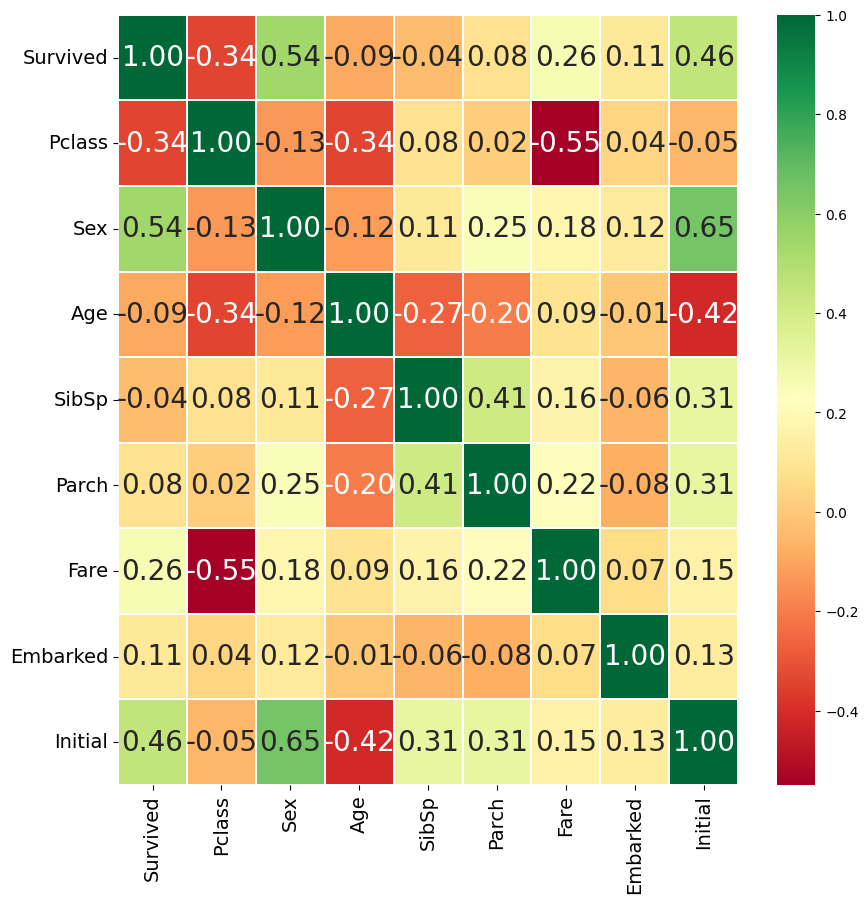

In [39]:
df_c=df.copy()
df_c.drop(['Name','Ticket','Age_group'],axis=1,inplace=True)

plt.rcParams['font.family'] = 'DejaVu Sans'
sns.heatmap(df_c.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20},fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

문자형 변수인 name과, ticket, 그리고 Age_group을 제거하고 상관계수를 출력해보았다.
Sex, Embarked, Initial의 상관계수를 파악하기 위해 수치형 데이터로 변환시켰다.

그 결과 각 변수들 사이에 0.7이상인 높은 상관관계를 가진 변수들이 없다는 것을 확인하였다. 


## 모델 훈련

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(['Survived', 'Name', 'Ticket','Age_group'], axis=1)  
Y = df['Survived']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

model = LogisticRegression(max_iter=1000)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('로지스틱 회귀 정확도:',metrics.accuracy_score(prediction3,test_Y))

로지스틱 회귀 정확도: 0.8246268656716418


로지스틱 회귀를 실행했더니 정확도가 0.82%가 나왔다. 조금 더 높여보겠다.

In [ ]:
df.isnull().sum()

## 3-3. 정확도 출력

